# Convolution (CNN)

Hi, hello, welcome, today we will work on convolutional neural networks.

I use MNIST dataset - pictures of numbers 0-9 28px/28px, black&white pictures, as matrixes.

Let's get started!

## Import

In [182]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## Get dataset

In [183]:
transform = transforms.ToTensor()

train_dataset = torchvision.datasets.MNIST(
    root='../data/data-conv',
    train=True,
    download=True,
    transform=transform
)

## One picture (example data)

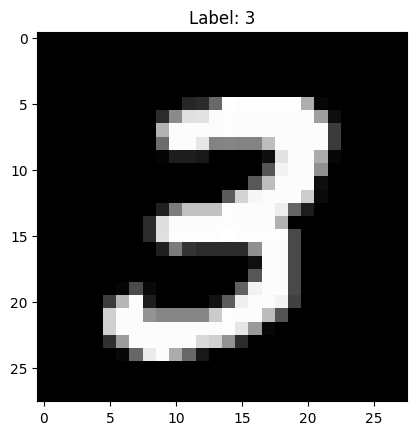

3
torch.Size([1, 28, 28])
tensor(0.)
tensor(0.9882)


In [184]:
image, label = train_dataset[7]

plt.imshow(image.squeeze(),cmap='gray')
plt.title(f"Label: {label}")
plt.show()

print(label)
print(image.shape)
print(image[0][0][0]) # there is nothing in left top corner, thus the outcome is 0. zero
print(image[0][14][15]) # this pixel is part of the written number, so it is not zero, it's nearer to one (all white)

That was one picture, but to train the model we use more. Let's get to it - the batch.

## Batch of images

In [185]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32,shuffle=True)
images, labels = next(iter(train_loader))

images.shape # 32 * 1d * 2d(28x28) array

torch.Size([32, 1, 28, 28])

## Convolution (finding schemes)

In [186]:
import torch.nn as nn

conv = nn.Conv2d(
    in_channels=1,
    out_channels=8,
    kernel_size=3
)

output = conv(image.unsqueeze(0)) # we work again on one picture
output.shape


torch.Size([1, 8, 26, 26])

## Pooling (simplifying)

In [187]:
pool = nn.MaxPool2d(kernel_size=2)

pooled = pool(output)
pooled.shape

torch.Size([1, 8, 13, 13])

## Visuals

Now, for the sake of understanding convolution and pooling better, let's take a look at how the images change with filters.

Here is our original image:

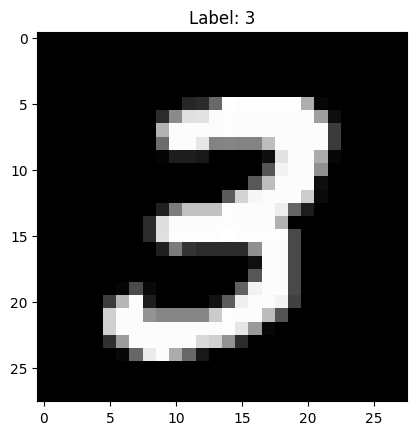

In [191]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(f"Label: {label}")
plt.show()

Now convolution:

torch.Size([8, 26, 26])


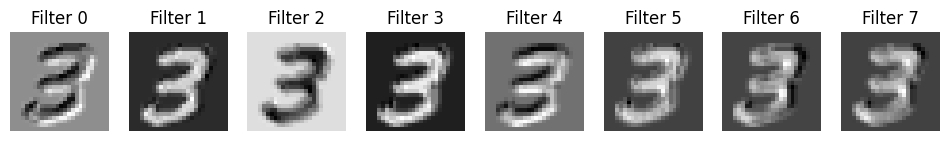

In [192]:
with torch.no_grad():
    conv_out = conv(image)

print(conv_out.shape)

plt.figure(figsize=(12,3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(conv_out[i], cmap='gray')
    plt.title(f'Filter {i}')
    plt.axis('off')

plt.show()

And after pooling:

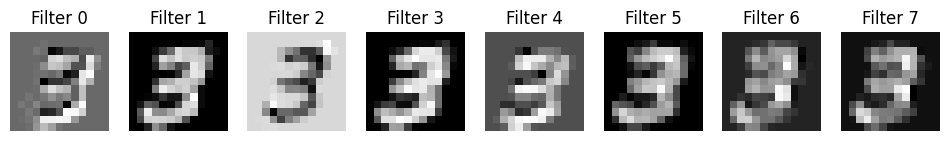

In [190]:
pool_out = pool(conv_out)

plt.figure(figsize=(12,3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(pool_out[i], cmap='gray')
    plt.title(f'Filter {i}')
    plt.axis('off')

plt.show()

As we see our image changed. Convolution created 8 filters, as we stated it earlier:

```py
conv = nn.Conv2d(
    in_channels=1, # one image
    out_channels=8, # 8 out images
    kernel_size=3 # size of filtering window
)
```

Then pooling simplified it and we got here.

Now let's continue with rightful CNN.